# Linear Regression

You are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You'd like to figure out what the expected profit of a new food truck might be given only the population of the city that it would be placed in.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import os
data = pd.read_csv(os.getcwd() + '/ex1/ex1data1.txt', names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


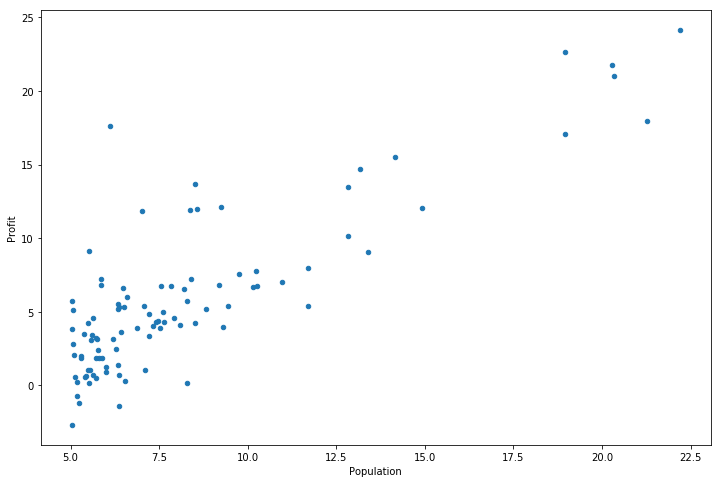

In [5]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [7]:
# Cost Function
def computeCost(X, y, theta):
    sqerr = np.power(((X * theta.T) - y), 2)
    return np.sum(sqerr) / (2 * len(X))

In [9]:
# insert the intercept feature in data
data.insert(0, 'x0', 1)

ValueError: cannot insert x0, already exists

In [10]:
# set X and y
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

In [11]:
X.head()

,x0,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [12]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [13]:
# convert X and y to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [14]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [15]:
# Initial cost
computeCost(X, y, theta)

32.072733877455676

In [16]:
# Implement Gradient Descent algorithm
def gradientDescent(X, y, theta, alpha, iters):
    n = int(theta.ravel().shape[1])
    costs = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        theta = theta - ((alpha / len(X)) * (error.T * X))
        costs[i] = computeCost(X, y, theta)
        
    return theta, costs

In [17]:
# Initialize variables to perform Gradient Descent
alpha = 0.01
iters = 1000

In [18]:
# run gradient descent
theta, costs = gradientDescent(X, y, theta, alpha, iters)

In [19]:
theta.shape, costs.shape

((1, 2), (1000,))

In [20]:
# Compute the cost of the trained model
computeCost(X, y, theta)

4.515955503078912

In [21]:
costs[iters - 1]

4.515955503078912

Text(0.5,1,'Linear model to predict Profit')

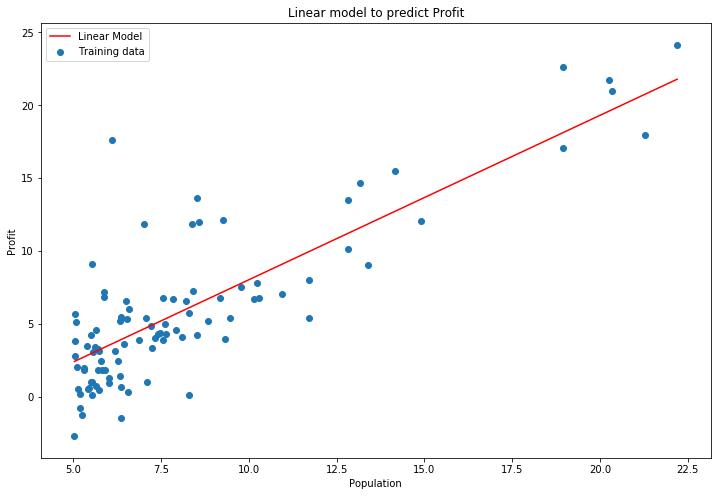

In [24]:
# Plot the linear model
x = np.linspace(data.Population.min(), data.Population.max(), 100)
h = theta[0,0] + (theta[0,1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, h, 'r', label='Linear Model')

ax.scatter(data.Population, data.Profit, label='Training data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Linear model to predict Profit')

In [32]:
# Predict profits for given Population sizes
pred1 = np.matrix([1, 3.5]) * theta.T
pred2 = np.matrix([1,   7]) * theta.T
print('Prediction for Population:\nFor 3.5 is', pred1[0,0], '\nFor 7 is', pred2[0,0], '\n')

Prediction for Population:
For 3.5 is 0.7041275642242226 
For 7 is 4.649657272722868 



Text(0.5,1,'Error over time')

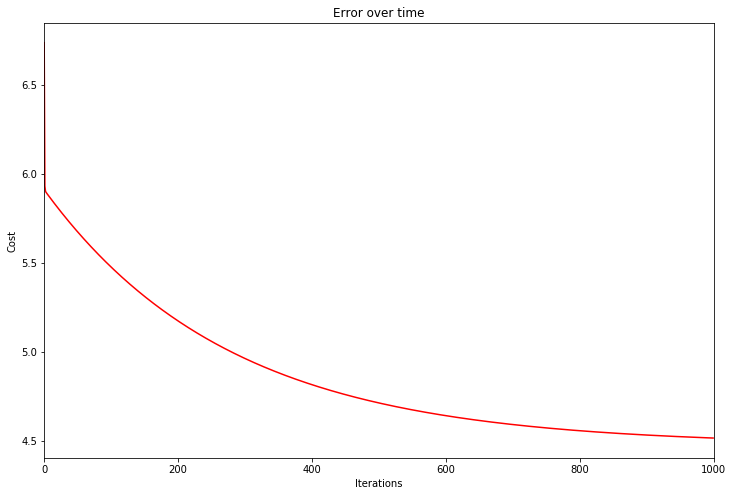

In [37]:
# Plot the cost over iterations
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), costs, 'r')
ax.set_xlim(0, 1000)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error over time')

# Linear Regression with Multiple variables
predict the price that a house will sell for

In [153]:
# Load the multivariate data
data2 = pd.read_csv(os.getcwd() + '/ex1/ex1data2.txt', names=['Size', 'Beedrooms', 'Price'])
data2.head()

,Size,Beedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [154]:
data2.describe()

,Size,Beedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [162]:
cols = data2.shape[1]

X2d = data2.iloc[:, 0:cols-1]
y2d = data2.iloc[:, cols-1:cols]

X2d.head()

,Size,Beedrooms
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [163]:
y2d.head()

,Price
0,399900
1,329900
2,369000
3,232000
4,539900


In [164]:
# Perform Normalizing and Feature Scailing of X
mu2 = X2d.mean()
sigma2 = X2d.std()

In [165]:
X2d= (X2d - mu2) / sigma2
X2d.head()

,Size,Beedrooms
0,0.130010,-0.223675
1,-0.504190,-0.223675
2,0.502476,-0.223675
3,-0.735723,-1.537767
4,1.257476,1.090417


In [166]:
# add bias feature
X2d.insert(0, 'x0', 1)

In [167]:
# convert to numpy matrices and initialize theta
X2 = np.matrix(X2d.values)
y2 = np.matrix(y2d.values)

In [168]:
theta2 = np.matrix(np.zeros(shape=(1, X2.shape[1])))

In [169]:
# Perform linear regression on the data set
theta2, costs2 = gradientDescent(X2, y2, theta2, alpha, iters)

In [170]:
# Error/Cost of the model
computeCost(X2, y2, theta2)

2043544218.7812893

In [171]:
costs2[-1]

2043544218.7812893

Text(0.5,1,'Cost of the model over iterations')

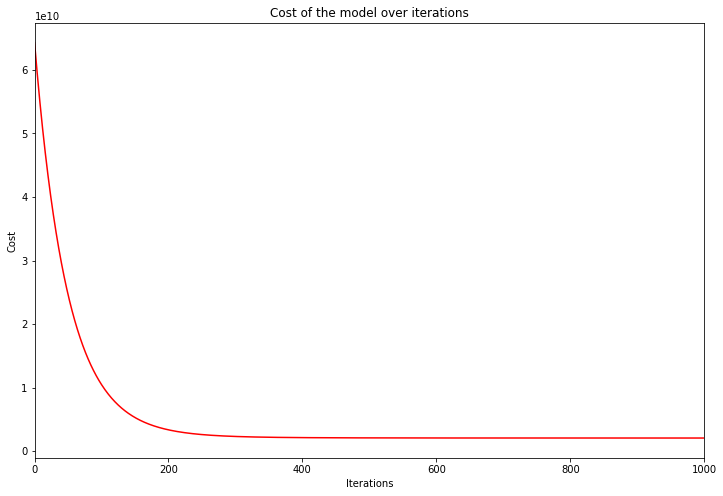

In [172]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), costs2, 'r')
ax.set_xlim(0, 1000)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost of the model over iterations')

In [210]:
# Predict Price for a 1650 sq-ft house with 3 bedrooms
x2 = np.matrix(np.array([1650, 3]))

In [213]:
x2ns = (x2 - np.matrix(mu2)) / np.matrix(sigma2)

In [222]:
# predict
x2ns = np.insert(x2ns, 0, 1)

In [227]:
predict = x2ns * theta2.T
print('Price for 1650 sq-ft house with 3 bedrooms is $%0.2f' % predict[0,0])

Price for 1650 sq-ft house with 3 bedrooms is $293237.16


#####################################
# Run Linear Regression using sklearn

In [229]:
from sklearn import linear_model

model = linear_model.LinearRegression()

data = pd.read_csv(os.getcwd() + '/ex1/ex1data1.txt', names=['Population', 'Profit'])

cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

In [230]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5,1,'Predicted Profit vs Population size')

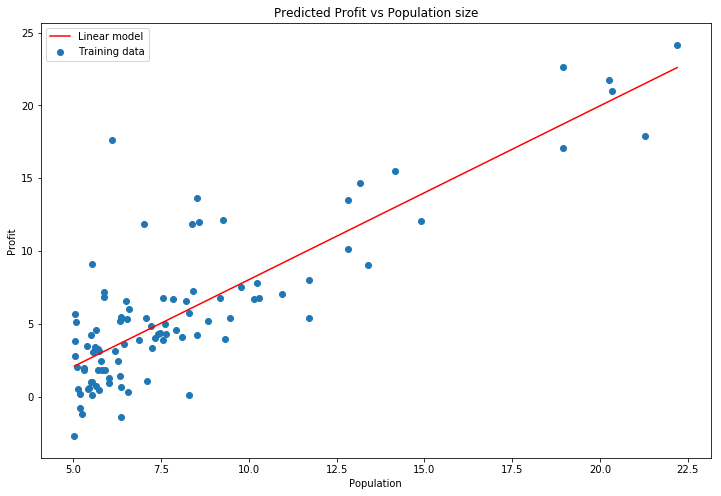

In [247]:
x = np.matrix(np.linspace(data.Population.min(), data.Population.max(), 100)).T
h = model.predict(x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, h, 'r', label='Linear model')
ax.scatter(data.Population, data.Profit, label='Training data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs Population size')

In [250]:
# Predict Price for a 1650 sq-ft house with 3 bedrooms
xsk = np.matrix(np.array([7]))
predict = model.predict(xsk)
print('Profits for 7 units of population is %0.2f units' % predict)

Profits for 7 units of population is 4.46 units
